In [3]:
# Team Members
# Joed Quaye 
# Ronald Chomnou 
# Griffin Araujo

# Part 1: Wrangling
# compute a relation containing the total payroll and winning percentage for each team

import sqlite3
import pandas 
import numpy

# creating Connection object that represents the database
connection = sqlite3.connect('lahman2014.sqlite')

# create cursor object to perform SQL commands
c = connection.cursor()

# tabulating payroll for each year 
salary_query = "SELECT yearID, teamID, sum(salary) as total_payroll FROM Salaries WHERE lgID == 'AL' GROUP BY yearID, teamID"

# Read SQL query or database table into a DataFrame.
team_salaries = pandas.read_sql(salary_query, connection)

team_query = """
    SELECT 
        teamID,
        yearID,
        sum(W) as total_wins,
        sum(G) as total_games,
        CAST(sum(W) AS FLOAT) * 100.0 / CAST(sum(G) AS FLOAT) as winning_percentage
    FROM Teams
    GROUP BY teamID, yearID
"""

# mean_query = "SELECT yearID, sum(salary)/count(salary) as salary_mean FROM Salaries GROUP BY yearID"

team_table = pandas.read_sql(team_query, connection)
# mean_table = pandas.read_sql(mean_query, connection)

# the team salaries

result = pandas.merge(team_salaries, team_table, how='outer', on=['yearID', 'teamID'])
# result = result = pandas.merge(result, mean_table, how='outer', on=['yearID'])

# this is the table
result 


# with the missing data, we just ignored it because we used inner join after obtaining the data from the SQL query 
# (that's why some of the data shows up as NaN)

,yearID,teamID,total_payroll,total_wins,total_games,winning_percentage
0,1985,BAL,11560712.0,83,161,51.552795
1,1985,BOS,10897560.0,81,163,49.693252
2,1985,CAL,14427894.0,90,162,55.555556
3,1985,CHA,9846178.0,85,163,52.147239
4,1985,CLE,6551666.0,60,162,37.037037
...,...,...,...,...,...,...
2770,1887,WS8,NaN,46,126,36.507937
2771,1888,WS8,NaN,48,136,35.294118
2772,1889,WS8,NaN,41,127,32.283465
2773,1891,WS9,NaN,44,139,31.654676


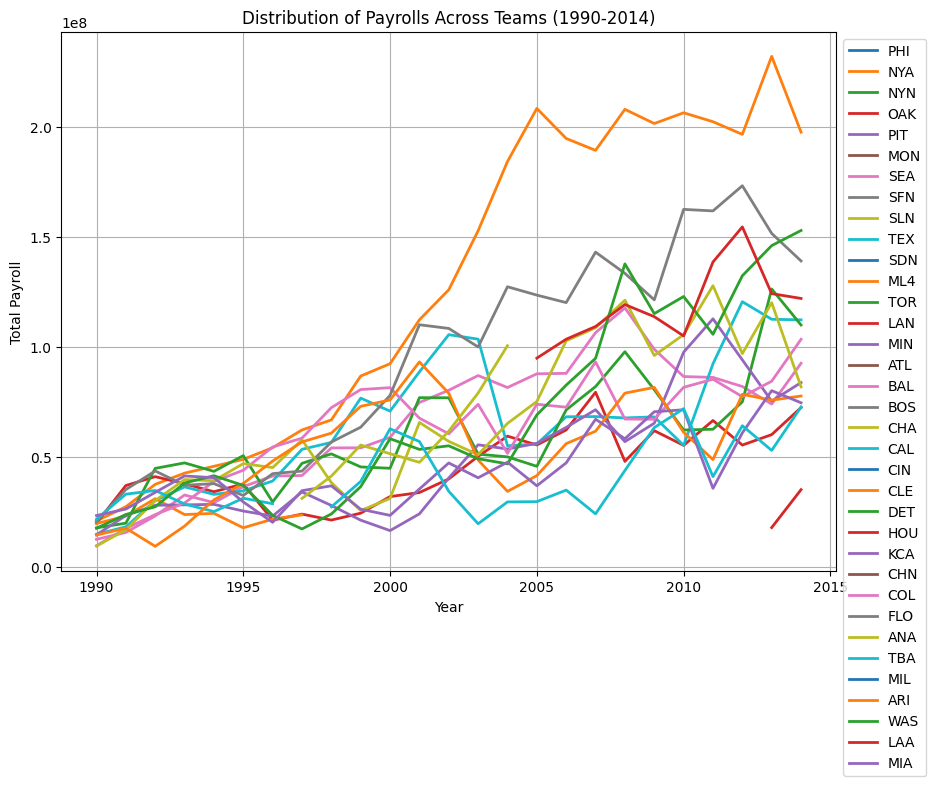

In [61]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# Sorting the result DataFrame by 'yearID' in ascending order
result = result.sort_values("yearID", ascending=True)

# Filtering the result DataFrame for the years 1990 to 2014
temp_result = result[(result['yearID'] >= 1990) & (result['yearID'] <= 2014)]

# Creating a copy of the subset to avoid SettingWithCopyWarning
temp_result = temp_result.copy()

# Setting the index of temp_result to 'teamID'
temp_result = temp_result.set_index('teamID')

# Initializing the year variable to 1990
year = 1990

# Plotting the data for each team
teams = temp_result.index.unique()  # Use unique() to get team IDs

plt.figure(figsize=(10, 7))  # Figure Size

for t in teams:
    team_data = temp_result[temp_result.index == t]
    plt.plot(team_data['yearID'], team_data['total_payroll'], label=t, linewidth=2)

plt.xlabel('Year')
plt.ylabel('Total Payroll')
plt.title('Distribution of Payrolls Across Teams (1990-2014)')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.show()

#### Question 1
#All of the league's teams have seen an increase in payroll distribution over time, which points to a general upward trend in financial 
# contributions to professional sports. Furthermore, the increasing differences in payrolls between teams point to a rising 
#financial resource gap among them, which may be a reflection of changing economic conditions in the league between 1990 and 2014.

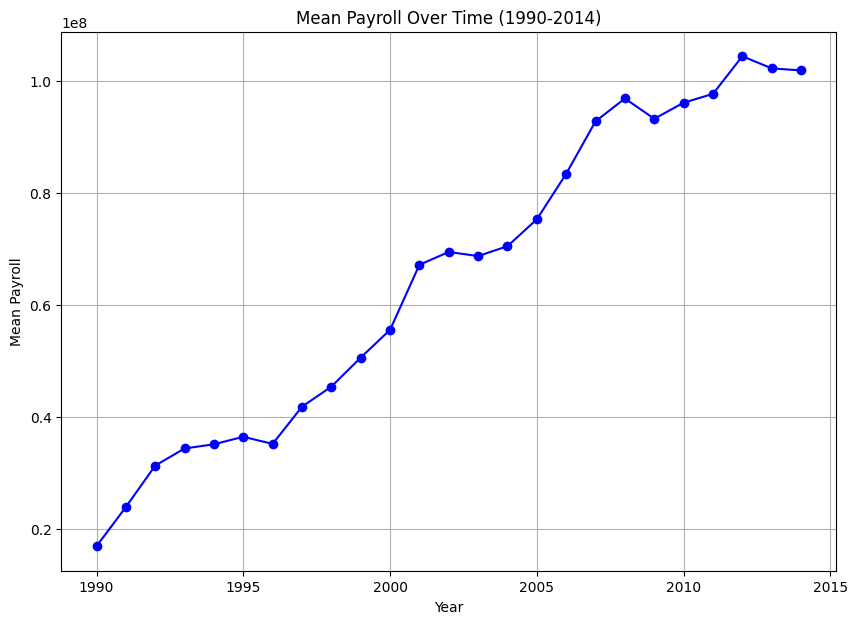

In [62]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# Sorting the result DataFrame by 'yearID' in ascending order
result = result.sort_values("yearID", ascending=True)

# Filtering the result DataFrame for the years 1990 to 2014
temp_result = result[(result['yearID'] >= 1990) & (result['yearID'] <= 2014)]

# Grouping by 'yearID' and calculating the mean payroll for each year
mean_payroll_by_year = temp_result.groupby('yearID')['total_payroll'].mean()

# Plotting the mean payroll over time
plt.figure(figsize=(10, 7))  # Adjust the figure size as needed

plt.plot(mean_payroll_by_year.index, mean_payroll_by_year.values, marker='o', linestyle='-', color='b')

plt.xlabel('Year')
plt.ylabel('Mean Payroll')
plt.title('Mean Payroll Over Time (1990-2014)')
plt.grid(True)
plt.show()

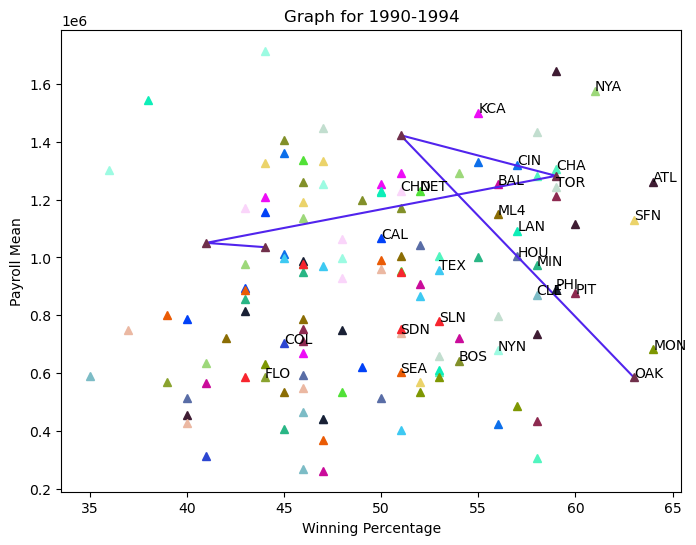

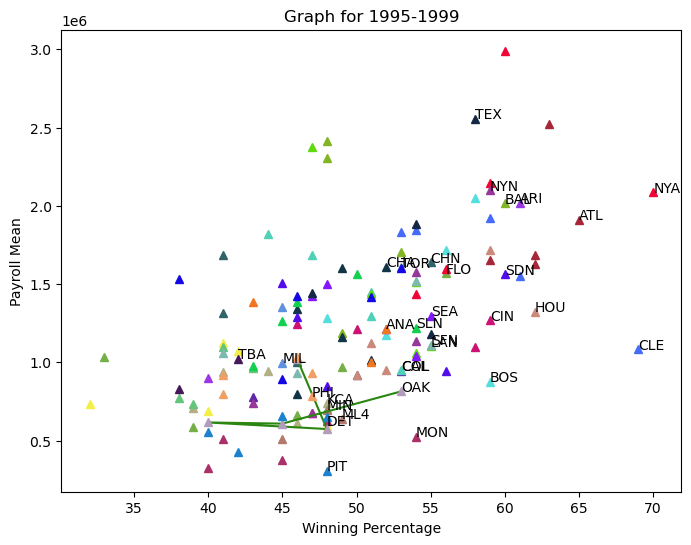

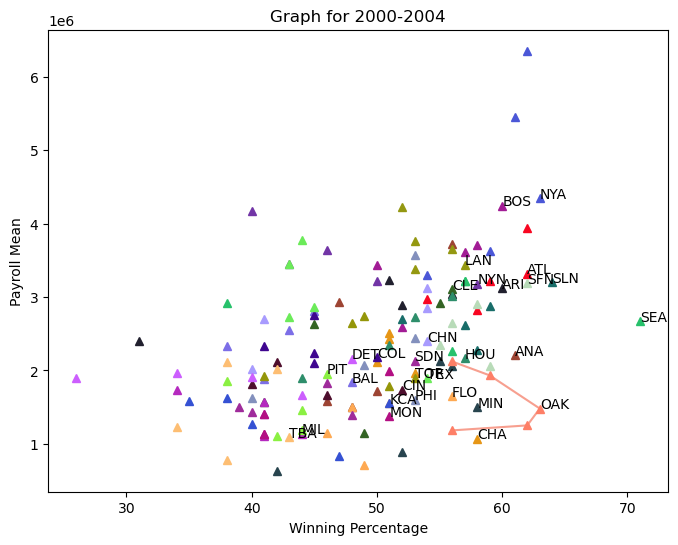

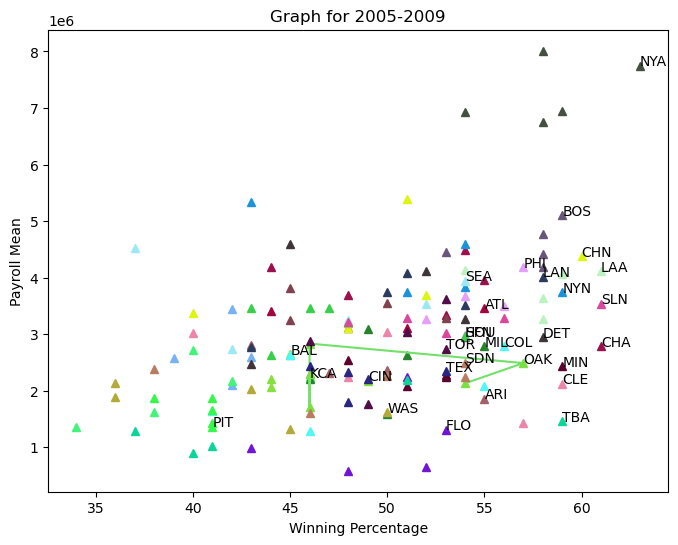

In [4]:
import matplotlib.pyplot as plt
import pandas
import sqlite3
import numpy

def plot_graph(group, title):
    plt.figure(figsize=(8, 6))
    teams = group['teamID'].drop_duplicates()
    temp_result = group[['teamID', 'winning_percentage', 'payroll_mean']]
    temp_result = temp_result.set_index('teamID')

    for t in teams:
        temp1 = group.loc[lambda group: group.teamID == t, :]
        best_row = temp1.loc[temp1['winning_percentage'].idxmax()]
        plt.annotate(t, xy=(best_row['winning_percentage'], best_row['payroll_mean']))
        if t == 'OAK':
            plt.plot(temp_result.loc[t, 'winning_percentage'], temp_result.loc[t, 'payroll_mean'],
                     '-', color=numpy.random.rand(3,))
        plt.plot(temp_result.loc[t, 'winning_percentage'], temp_result.loc[t, 'payroll_mean'],
                 '^', color=numpy.random.rand(3,))

    plt.title(title)
    plt.xlabel('Winning Percentage')
    plt.ylabel('Payroll Mean')
    plt.show()

# Creating Connection object for the database
conn = sqlite3.connect('lahman2014.sqlite') 
new_query = "SELECT  teamID,yearID, sum(salary)/count(salary) as payroll_mean FROM Salaries GROUP BY teamID,yearID"
new_query2 = "SELECT  teamID,yearID, W*100/G as winning_percentage FROM Teams GROUP BY teamID,yearID"
query1 = pandas.read_sql(new_query, conn)
query2 = pandas.read_sql(new_query2, conn)

group_table = pandas.merge(query1, query2, how='outer', on=['yearID', 'teamID'])

bins = [1989, 1994, 1999, 2004, 2009, 2015]
group_names = ['1990-1994', '1995-1999', '2000-2004', '2005-2009', '2010-2015']
categories = pandas.cut(group_table['yearID'], bins, labels=group_names)
group_table['categories'] = pandas.cut(group_table['yearID'], bins, labels=group_names)

grouped = group_table.groupby('categories', observed=False)

# Plot for 1990-1994
plot_graph(grouped.get_group('1990-1994'), 'Graph for 1990-1994')

# Plot for 1995-1999
plot_graph(grouped.get_group('1995-1999'), 'Graph for 1995-1999')

# Plot for 2000-2004
plot_graph(grouped.get_group('2000-2004'), 'Graph for 2000-2004')

# Plot for 2005-2009
plot_graph(grouped.get_group('2005-2009'), 'Graph for 2005-2009')

#### Question 2
#The analysis indicates that the New York Yankees consistently excel at paying for wins across all time periods. 
#In contrast, the Oakland Athletics show spending efficiency by maintaining a position within the average or main 
#cluster of teams in the relationship between winning percentage and payroll mean.

In [5]:
#problem 5
import statistics

# Initializing the year variable to 1985
year = 1985
payroll_lst = []
payroll_avg = {}
payroll_std = {}
query1

for index, row in query1.iterrows():
    if year != row['yearID']:
        avg = statistics.mean(payroll_lst)
        std = statistics.stdev(payroll_lst)
        payroll_avg[year] = avg
        payroll_std[year] = std
        year = row['yearID']
        payroll_lst = [row['payroll_mean']]
    else:
        payroll_lst.append(row['payroll_mean'])


payroll_std[year] = statistics.stdev(payroll_lst)
payroll_avg[year] = statistics.mean(payroll_lst)
stand = []

for index, row in query1.iterrows():
    year = row['yearID']
    payroll = row['payroll_mean']
    stand.append((payroll - payroll_avg[year]) / payroll_std[year])

query1['Standardized_Payroll'] = stand

query1

,teamID,yearID,payroll_mean,Standardized_Payroll
0,ATL,1985,6.730455e+05,1.946823
1,BAL,1985,5.254869e+05,0.500248
2,BOS,1985,4.359024e+05,-0.377984
3,CAL,1985,5.152819e+05,0.400205
4,CHA,1985,4.688656e+05,-0.054832
...,...,...,...,...
855,SLN,2014,4.310464e+06,-0.089295
856,TBA,2014,2.907564e+06,-0.508067
857,TEX,2014,4.677294e+06,0.020206
858,TOR,2014,4.396804e+06,-0.063522


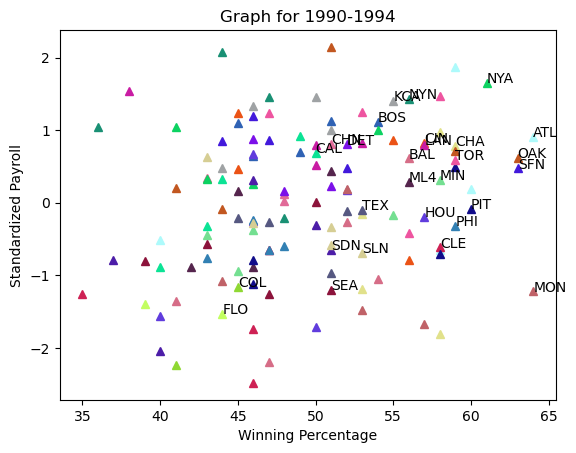

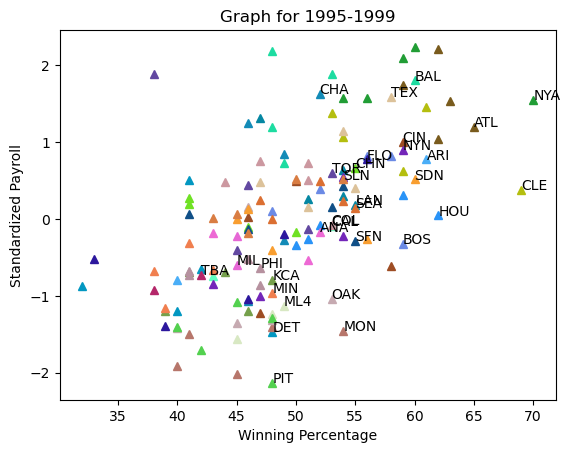

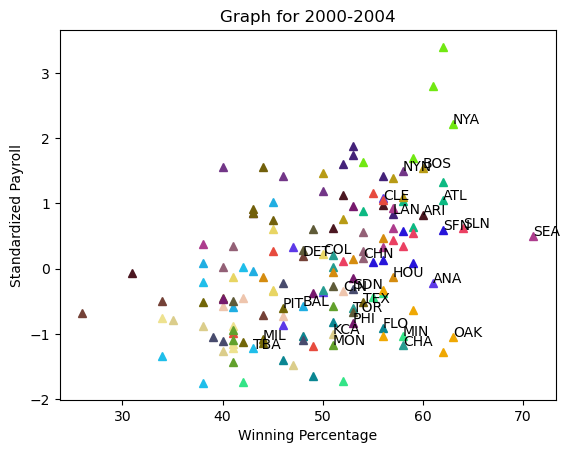

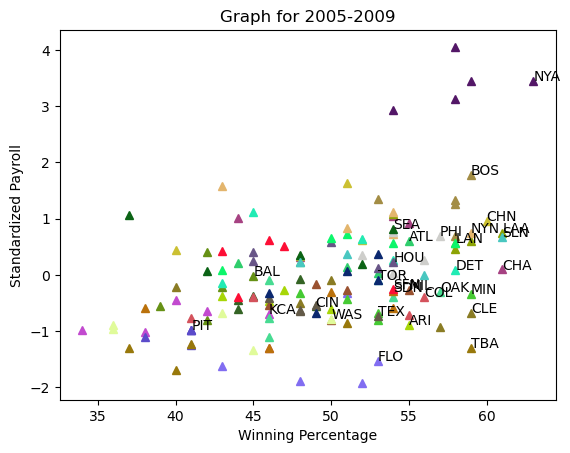

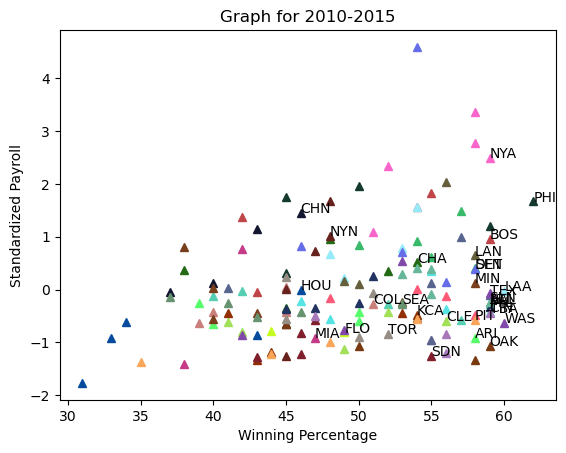

In [6]:
def plot_graph2(group, title):
    teams = group['teamID'].drop_duplicates()
    temp_result = group[['teamID', 'winning_percentage', 'Standardized_Payroll']]
    temp_result = temp_result.set_index('teamID')
    for t in teams:
        temp1 = group.loc[lambda group: group.teamID == t, :]
        best_row = temp1.loc[temp1['winning_percentage'].idxmax()]
        plt.annotate(t, xy=(best_row['winning_percentage'], best_row['Standardized_Payroll']))
        plt.plot(temp_result.loc[t, 'winning_percentage'], temp_result.loc[t, 'Standardized_Payroll'], '^',
                 color=numpy.random.rand(3, ))
    plt.title(title)
    plt.xlabel('Winning Percentage')
    plt.ylabel('Standardized Payroll')
    plt.show()


def plot_graph3(group, title):
    teams = group['teamID'].drop_duplicates()
    temp_result = group[['teamID', 'winning_percentage', 'Standardized_Payroll']]
    temp_result = temp_result.set_index('teamID')
    group = group.dropna();
    for t in teams:
        temp1 = group.loc[lambda group: group.teamID == t, :]
        if temp1['winning_percentage'].empty:
            print()
        else:
            best_row = temp1.loc[temp1['winning_percentage'].idxmax()]
            plt.annotate(t, xy=(best_row['winning_percentage'], best_row['Standardized_Payroll']))
            plt.plot(temp_result.loc[t, 'winning_percentage'], temp_result.loc[t, 'Standardized_Payroll'], '^',
                 color=numpy.random.rand(3, ))
    plt.title(title)
    plt.xlabel('Winning Percentage')
    plt.ylabel('Standardized Payroll')
    plt.show()


group_table = pandas.merge(query1, query2, how='outer', on=['yearID','teamID'])

bins = [1989,1994,1999,2004,2009,2015]
group_names = ['1990-1994','1995-1999','2000-2004','2005-2009','2010-2015']
categories = pandas.cut(group_table['yearID'],bins,labels=group_names)
group_table['categories'] = pandas.cut(group_table['yearID'], bins, labels=group_names)

grouped = group_table.groupby('categories',  observed=False)

group1 = grouped.get_group('1990-1994')
group2 = grouped.get_group('1995-1999')
group3 = grouped.get_group('2000-2004')
group4 = grouped.get_group('2005-2009')
group5 = grouped.get_group('2010-2015')

# Plot for 1990-1994
plot_graph2(grouped.get_group('1990-1994'), 'Graph for 1990-1994')

# Plot for 1995-1999
plot_graph2(grouped.get_group('1995-1999'), 'Graph for 1995-1999')

# Plot for 2000-2004
plot_graph2(grouped.get_group('2000-2004'), 'Graph for 2000-2004')

# Plot for 2005-2009
plot_graph2(grouped.get_group('2005-2009'), 'Graph for 2005-2009')

# Plot for 2010-2015
#Key error so it needs to be done different
plot_graph3(grouped.get_group('2010-2015'), 'Graph for 2010-2015')

#Question 3
#Problem 4 and Problem 6 plots reveal a different more precise
#distribution of the payroll variable. That is caused by the difference
#in the mean variable and the standardized variable



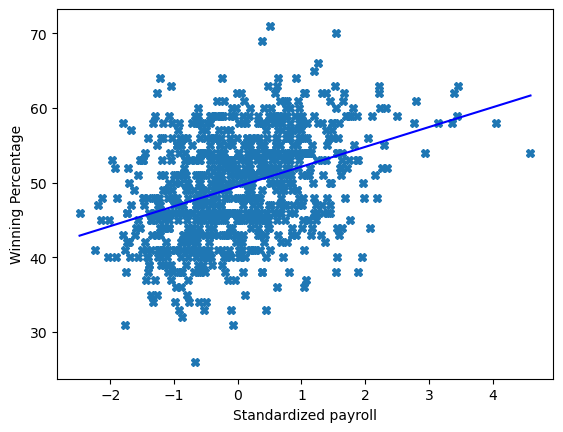

In [8]:
#Question 7
import numpy as np

group_table = group_table[np.isfinite(group_table['winning_percentage'])]
group_table = group_table[np.isfinite(group_table['Standardized_Payroll'])]
slope, intercept = np.polyfit(group_table['Standardized_Payroll'], group_table['winning_percentage'], 1)
points = np.linspace(group_table['Standardized_Payroll'].min(),group_table['Standardized_Payroll'].max(),100)
plt.plot(group_table['Standardized_Payroll'],group_table['winning_percentage'],'X')
plt.plot(points, slope*points+intercept, color='b')
plt.xlabel('Standardized payroll')
plt.ylabel('Winning Percentage')
plt.show()

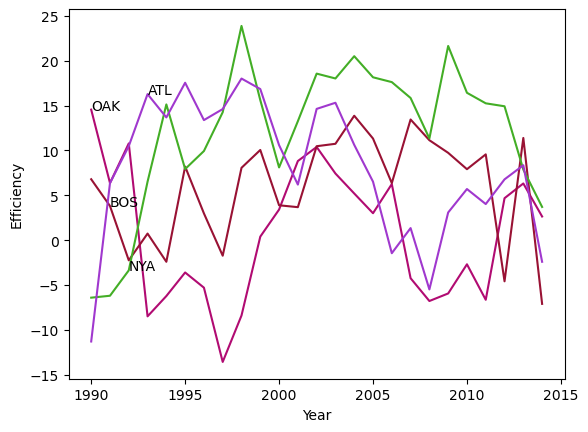

In [9]:
#Question 8
efficiency = []

for index, row in group_table.iterrows():
    efficiency.append(row['winning_percentage'] - 50 + 2.5 * row['Standardized_Payroll'])

group_table['efficiency'] = efficiency
group_table.sort_values("yearID", ascending=True)
temp_result = group_table[group_table['yearID'] >= 1990]
temp_result = temp_result[temp_result['yearID'] <= 2014]
teams = ['OAK', 'BOS', 'NYA', 'ATL', 'TBA']
temp_result = temp_result[['yearID', 'teamID', 'efficiency']]
temp_result = temp_result.set_index('teamID')
year = 1990
for t in teams:
    temp1 = temp_result.loc[lambda temp_result: temp_result.yearID == year, :]
    if t in temp1.index:
        num = temp1.loc[t,'efficiency']
        plt.annotate(t, xy = (year, num))
        plt.plot(temp_result.loc[t,'yearID'], temp_result.loc[t,'efficiency'],color=numpy.random.rand(3,))
        if (year < 2014):
            year+=1
        else:
            year = 1990
plt.ylabel('Efficiency')
plt.xlabel('Year')
plt.show()
#Question 4
#I can learn that efficient teams are ones that are good at paying for
#wins. An example is NYA. Oaklands efficiency was good as it shot up
#during the moneyball period.